Using data from [The Interview Attendance Problem](https://www.kaggle.com/vishnusraghavan/the-interview-attendance-problem)

In [118]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

df = pd.read_csv('1.5.1Interview.csv')

print('Number of records:', len(df))

df.head(3)

Number of records: 1234


,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN


In [119]:
# it looks like from col 23 over they are all blank, so i'm going to double check 
# and then drop any that are empty of values

cols = df.columns.values.tolist()

# printing the list of col names for reference later
print(cols)

# double checking whether or not the cols are empty
for val in cols[23:]:
    print(val, df[val].unique())
    
# they're empty, so they're getting dropped
df.drop(columns=cols[23:], inplace=True)

['Date of Interview', 'Client name', 'Industry', 'Location', 'Position to be closed', 'Nature of Skillset', 'Interview Type', 'Name(Cand ID)', 'Gender', 'Candidate Current Location', 'Candidate Job Location', 'Interview Venue', 'Candidate Native location', 'Have you obtained the necessary permission to start at the required time', 'Hope there will be no unscheduled meetings', 'Can I Call you three hours before the interview and follow up on your attendance for the interview', 'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much', 'Have you taken a printout of your updated resume. Have you read the JD and understood the same', 'Are you clear with the venue details and the landmark.', 'Has the call letter been shared', 'Expected Attendance', 'Observed Attendance', 'Marital Status', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27']
Unnamed: 23 [ nan]
Unnamed: 24 [ nan]
Unnamed: 25 [ nan]
Unnamed: 26 [ nan]
Unnamed: 27 [

In [193]:
# 13 thru 19 (inclusive) are questions with extremely long names 
# renaming them to 'Q #' and then keep the list for reference later

colrn = {}
x = 1

for ques in cols[13:20]:
    newname = 'Q' + str(x)
    colrn[ques] = newname
    x= x+1
    
df.rename(index=str, columns=colrn, inplace=True)

In [194]:
# reminder of what the questions are, again, for later reference
print(colrn)

{'Have you obtained the necessary permission to start at the required time': 'Q1', 'Hope there will be no unscheduled meetings': 'Q2', 'Can I Call you three hours before the interview and follow up on your attendance for the interview': 'Q3', 'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much': 'Q4', 'Have you taken a printout of your updated resume. Have you read the JD and understood the same': 'Q5', 'Are you clear with the venue details and the landmark.': 'Q6', 'Has the call letter been shared': 'Q7'}


In [195]:
# taking a look at the cleaned up dataframe
df.head(1)

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Expected Attendance,Observed Attendance,Marital Status
0,2015-02-13,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single


In [123]:
# cleaning up data in diff different columns

# get rid of rows w/ NaN
df = df.dropna(how='any')

# clean up the dates
df['Date of Interview'] = pd.to_datetime(df['Date of Interview'], errors='coerce')

df['Date of Interview'] = df['Date of Interview'].dt.date

df['Date of Interview'].unique()

array([datetime.date(2015, 2, 13), datetime.date(2015, 6, 19),
       datetime.date(2015, 6, 23), datetime.date(2015, 6, 29),
       datetime.date(2015, 6, 25), datetime.date(2016, 5, 25),
       datetime.date(2016, 4, 12), datetime.date(2016, 4, 13),
       datetime.date(2016, 2, 27), datetime.date(2016, 7, 5),
       datetime.date(2016, 5, 5), datetime.date(2016, 4, 5),
       datetime.date(2016, 4, 21), datetime.date(2016, 4, 22),
       datetime.date(2016, 4, 23), datetime.date(2016, 4, 15),
       datetime.date(2016, 4, 19), datetime.date(2016, 4, 20), nan,
       datetime.date(2016, 4, 25), datetime.date(2016, 4, 18),
       datetime.date(2016, 11, 5), datetime.date(2016, 10, 5),
       datetime.date(2017, 12, 4), datetime.date(2018, 12, 4),
       datetime.date(2019, 12, 4), datetime.date(2020, 12, 4),
       datetime.date(2022, 12, 4), datetime.date(2016, 8, 5),
       datetime.date(2016, 3, 19), datetime.date(2016, 5, 24),
       datetime.date(2016, 5, 11), datetime.date(2016,

In [181]:
# get a new list of col names since the old list isnt correct anymore
cols_updated = df.columns.values.tolist() 
print(cols_updated)

['Date of Interview', 'Client name', 'Industry', 'Location', 'Position to be closed', 'Nature of Skillset', 'Interview Type', 'Name(Cand ID)', 'Gender', 'Candidate Current Location', 'Candidate Job Location', 'Interview Venue', 'Candidate Native location', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Has the call letter been shared', 'Expected Attendance', 'Observed Attendance', 'Marital Status']


In [132]:
# clean up the columns with Yes or No (so from col 13: )
mylist = []

for those in cols_updated[13:-1]:
    # standardize capitalization
    df[those] = df[those].str.capitalize()
    
    # get rid of white space
    df[those] = df[those].str.strip()
    
    # get all of the values so i can make a dictionary to map the series to fewer options
    for value in df[those].unique():
        if value not in mylist:
            mylist.append(value)
            
print(mylist)

['Yes', 'No', 'Not yet', 'Yet to confirm', 'Na', 'Not sure', 'Cant say', 'No dont', 'No i have only thi number', 'No- will take it soon', 'No- i need to check', 'Havent checked', 'Need to check', 'Uncertain', '11:00 am', '10.30 am']


In [135]:
# dictionary to map the values to, created from that list
normed = {'Not yet': 'Uncertain', 'Yet to confirm': 'Uncertain', 'Not sure': 'Uncertain', 
          'Cant say': 'Uncertain', 'No- i need to check': 'Uncertain', 
          'Havent checked': 'Uncertain', 'Need to check': 'Uncertain', 
          'Uncertain': 'Uncertain','Na': 'Uncertain','No i have only thi number': 'No', 
          'No- will take it soon':'No', 'No dont': 'No', 'Yes': 'Yes', 'No': 'No', 
          '11:00 am': 'Yes', '10.30 am': 'Yes'}

for those in cols_updated[13:-1]:    
    # map the dict from above 
        df[those] = df[those].map(normed, na_action='ignore')

['No' 'Yes']


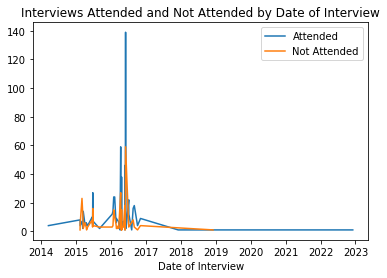

In [140]:
# lets compare the data from each row for the ppl who showed up at interviews vs those who
# didnt show

options = df['Observed Attendance'].unique()
print(options)

# based on actual values
fig = df[df['Observed Attendance']=='Yes'][
    ['Date of Interview','Observed Attendance']].sort_values(['Date of Interview'], 
    ascending=True).groupby('Date of Interview').count().plot()

df[df['Observed Attendance']=='No'][['Date of Interview',
    'Observed Attendance']].sort_values(['Date of Interview'],
    ascending=True).groupby('Date of Interview').count().plot(ax=fig)
plt.legend(['Attended','Not Attended'])
plt.title('Interviews Attended and Not Attended by Date of Interview')
plt.show()

In [142]:
# i was doing something with this but i'll come back to it
# i think i was going to get an average of attended or not for each date
table = df.loc[:,['Date of Interview','Observed Attendance']]
table.head(5)

,Date of Interview,Observed Attendance
0,2015-02-13,No
1,2015-02-13,No
3,2015-02-13,No
4,2015-02-13,No
5,2015-02-13,Yes


Ttest_indResult(statistic=0.41428614484805415, pvalue=0.68234395123685121)

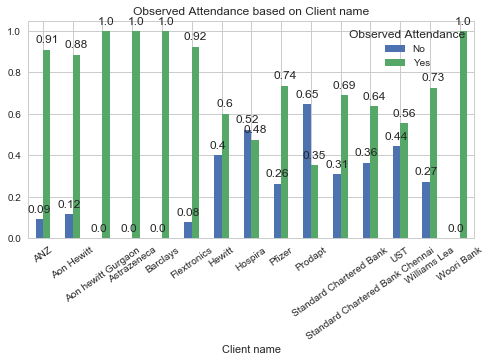

In [261]:
import scipy

colname = 'Client name'

# actual number
compare = df.groupby(colname)['Observed Attendance'].value_counts()

# average (normalized)
ax = df.groupby(colname)['Observed Attendance'].value_counts(normalize=True).unstack().plot(kind='bar',
                                                    figsize=(8,4))
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', 
    va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation=35)
plt.title('Observed Attendance based on ' + colname)


yes = df[df['Observed Attendance'] == 'Yes']
no = df[df['Observed Attendance'] == 'No']
scipy.stats.ttest_ind(yes.groupby(colname)['Observed Attendance'].value_counts(), 
                      no.groupby(colname)['Observed Attendance'].value_counts() )

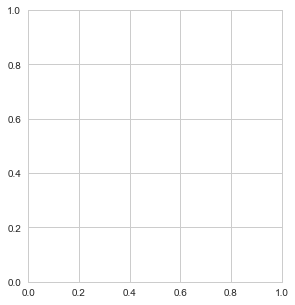

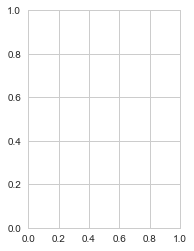

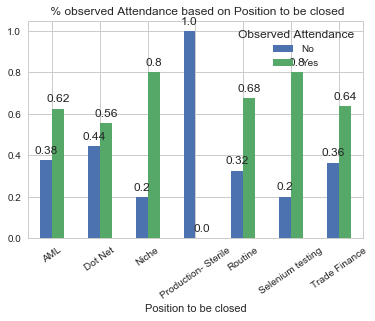

Ttest_indResult(statistic=0.66900834786576557, pvalue=0.51615471061332052)
Ttest_indResult(statistic=0.76284399233250422, pvalue=0.46160268235682633)


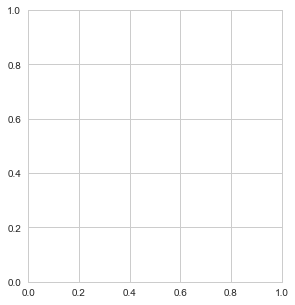

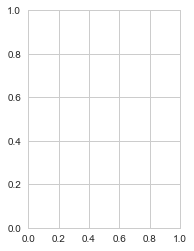

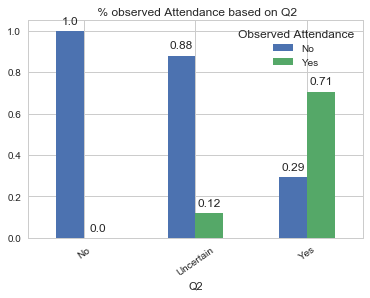

Ttest_indResult(statistic=0.52472520066540551, pvalue=0.62751097239821152)
Ttest_indResult(statistic=0.85654658075458301, pvalue=0.45466387012412857)


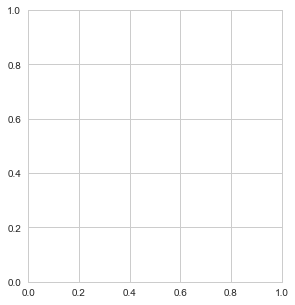

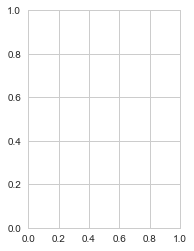

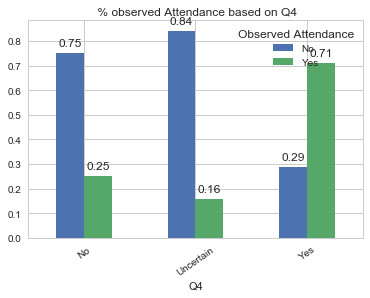

Ttest_indResult(statistic=0.51101697988575046, pvalue=0.63625236492250936)
Ttest_indResult(statistic=0.52006251694340966, pvalue=0.6304760857831837)


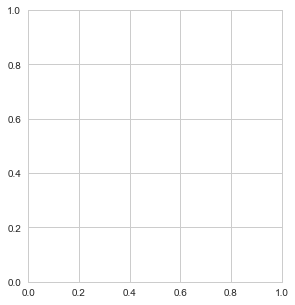

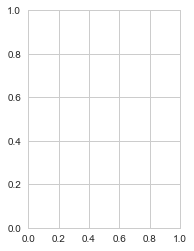

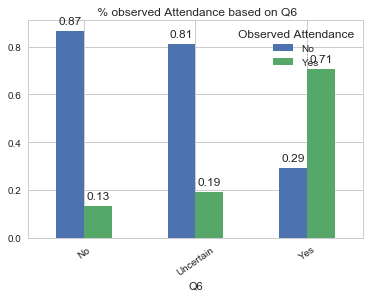

Ttest_indResult(statistic=0.5155887457918048, pvalue=0.6333289904989452)
Ttest_indResult(statistic=0.51325763844987238, pvalue=0.63481859077376668)


In [269]:
# now making that a function so i can apply it to multiple columns at once

def plot_col(colname, two):
    # actual number
    #df.groupby(colname)['Observed Attendance'].value_counts()

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1,2,1)
    # average (normalized)
    ax = df.groupby(colname)['Observed Attendance'].value_counts(normalize=True).unstack().plot(kind='bar',
                                                       # figsize=(8,4)
                                                        )
    for p in ax.patches: 
        ax.annotate(np.round(p.get_height(),decimals=2), 
        (p.get_x()+p.get_width()/2., p.get_height()), ha='center', 
        va='center', xytext=(0, 10), textcoords='offset points')
    plt.xticks(rotation=35)
    plt.title(' % observed Attendance based on ' + colname)
    
    plt.subplot(1,2,2)
    # average (normalized)
    ax = df.groupby(two)['Observed Attendance'].value_counts(normalize=True).unstack().plot(kind='bar',
                                                       # figsize=(8,4)
                                                        )
    for p in ax.patches: 
        ax.annotate(np.round(p.get_height(),decimals=2), 
        (p.get_x()+p.get_width()/2., p.get_height()), ha='center', 
        va='center', xytext=(0, 10), textcoords='offset points')
    plt.xticks(rotation=35)
    plt.title(' % observed Attendance based on ' + two)
    
    plt.show()
    print(scipy.stats.ttest_ind(yes.groupby(colname)['Observed Attendance'].value_counts(), 
                      no.groupby(colname)['Observed Attendance'].value_counts() ))
    print(scipy.stats.ttest_ind(yes.groupby(two)['Observed Attendance'].value_counts(), 
                      no.groupby(two)['Observed Attendance'].value_counts() ))
    return

# cut out 'Interview Type' bc the values were unclear (all were the same??)
# removing "nature of skillset" temporarily bc it looks like the data needs to be cleaned
# removed 'Candidate Native location'
# removing 'Location', ,'Candidate Current Location', 'Candidate Job Location', 
# Interview Venue',  because i think they should all be looked at together (will do separately)
# removed 'Gender' and 'Marital Status' to look at separately

showup = ['Industry', 'Position to be closed', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', ]

length = len(showup)
i = 0

while i+1 < length:
    plot_col(showup[i], showup[i+1])
    i = i +2

In [ ]:
sns.set(style="ticks")

# Create a dataset with many short random walks
#rs = np.random.RandomState(4)
#pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
#pos -= pos[:, 0, np.newaxis]
#step = np.tile(range(5), 20)
#walk = np.repeat(range(20), 5)
#df = pd.DataFrame(np.c_[pos.flat, step, walk],
#                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", col_wrap=5, size=1.5)

# Draw a line plot to show the trajectory of each random walk
grid.map(sns.barplot, "step", "position", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

In [255]:
sns.set(style="whitegrid")

#pd.pivot_table(df, values=None,  index=['Observed Attendance'], 
#               columns=['Marital Status', 'Gender'], aggfunc='count', 
#               fill_value=None, margins=False, dropna=True, margins_name='All')

#df.pivot(index=['Observed Attendance'], columns=['Marital Status'],
#        values=['Gender'])

testing = df.groupby(['Marital Status', 'Gender', 'Observed Attendance'])['Q7'].count()
testing
    
#g = sns.factorplot(x="Q7", y="Marital Status", hue="Gender",
#                   data=testing,                   size=16, kind="point", palette="BrBG",ci=95,dodge=True,join=False)
#g.despine(left=True)
#g.set_ylabels("# of books checked")
#g.set_xlabels("Age group of patron")
#plt.title('Obsered attendance based on marital status and gender')
#plt.show()

Marital Status  Gender  Observed Attendance
Married         Female  No                      37
                        Yes                     85
                Male    No                      74
                        Yes                    168
Single          Female  No                      34
                        Yes                     59
                Male    No                     163
                        Yes                    364
Name: Q7, dtype: int64

In [270]:
# removing 'Location', ,'Candidate Current Location', 'Candidate Job Location', 
# Interview Venue',  because i think they should all be looked at together

df.groupby(['Candidate Current Location', 'Interview Venue', 'Observed Attendance'])['Q7'].count()

Candidate Current Location  Interview Venue  Observed Attendance
- Cochin-                   - Cochin-        No                       3
                                             Yes                      6
Bangalore                   Bangalore        No                      56
                                             Yes                    148
                            Chennai          No                       1
                                             Yes                      5
                            Hyderabad        No                       1
                                             Yes                      3
CHENNAI                     Chennai          No                       1
Chennai                     Chennai          No                     206
                                             Yes                    399
                            Hosur            No                       4
                            Hyderabad        Yes                      1

In [ ]:
#.sort_values(['Date of Interview'], ascending=True).groupby('Date of Interview').mean()

# based on actual values
#fig = df[df['Observed Attendance']=='Yes'][
#    ['Date of Interview','Observed Attendance']].sort_values(['Date of Interview'], 
#    ascending=True).groupby('Date of Interview').count().plot()

df[df['Observed Attendance']=='No'][['Date of Interview',
    'Observed Attendance']].sort_values(['Date of Interview'],
    ascending=True).groupby('Date of Interview').count().plot(ax=fig)
plt.legend(['Attended','Not Attended'])
plt.title('Interviews Attended and Not Attended by Date of Interview')
plt.show()